ДЗ 10. Изучим словарный запас пользователей Reddit. Для выбранного месяца (чем свежее, тем лучше), постройте график разброса для количества уникальных слов в комментариях каждого пользователя и общего числа слов этого пользователя в этот месяц. Результат будет самым точным, если применить к словам т.н. "стемминг" или "лемматизацию" (приведение к основной форме). 

Источник данных:
[https://files.pushshift.io/reddit/comments/](https://files.pushshift.io/reddit/comments/), каждая строка файла является JSON объектом, содержащим информацию об 1 комментарии, файлы сжаты при помощи ZSTD, LZMA2 или BZIP2.

In [8]:
!pip3 install zstandard

In [9]:
import zstandard
import pathlib
import shutil

def decompress_zstandard_to_folder(input_file):
    input_file = pathlib.Path(input_file)
    with open(input_file, 'rb') as compressed:
        decomp = zstandard.ZstdDecompressor()
        output_path = pathlib.Path('C:/Users/vera.kosareva/data') / input_file.stem
        with open(output_path, 'wb') as destination:
            decomp.copy_stream(compressed, destination)

decompress_zstandard_to_folder('C:/Users/vera.kosareva/RC_2019-12.zst')

In [40]:
# Берем 50 авторов (больше мой комп не тянет)

import json

authors = set()

with open(r'C:/Users/vera.kosareva/data/RC_2019-12', "r") as file:
    for line in file:
        d = json.loads(line)
        if d['author'] == '[deleted]':
            continue
        authors.add(d['author'])
        if len(authors) == 50:
            break
authors        

{'Accountnum3billion',
 'AmInATizzy',
 'AmericanRedGuard',
 'AutoModerator',
 'Bobblefighterman',
 'ColdBrewCoffeeGuy',
 'ConjuringRock',
 'Crazy88Fanboy',
 'Dickobsession5',
 'Dunderbots',
 'Elderbrand',
 'EulerIdentity',
 'GKrollin',
 'HAIL_SATAN_DO_DRUGS',
 'HomeworkHelpBot',
 'Iamyous3f',
 'JohnX-ray',
 'JoshA20',
 'Junnius',
 'KingdomSTATS',
 'Limyta',
 'Loopedrage',
 'McRabbit23',
 'Mintsed',
 'Moonshot44',
 'PsychoTexan',
 'Raddiikkal',
 'SavageAxeBot',
 'ThatBritishPleb',
 'Thats_Real_Wack',
 'Uneeda_Biscuit',
 'Vezperia',
 'Violet_Emeraldyard',
 'Zied_Ta',
 'b1tcc',
 'billy13th99',
 'forestfluff',
 'gecmis_koleksiyoneri',
 'gr8te_guy',
 'grandmas_funtime',
 'jroque917',
 'lewpystill',
 'onesneakymofo',
 'pushk_a',
 'randomblackkiddd',
 'rockyp32',
 'ruscheinskyc',
 'victorcanfly',
 'zgamer200',
 'zuccinibikini'}

In [44]:
data = []

with open(r'C:/Users/vera.kosareva/data/RC_2019-12', "r") as file:
    for line in file:
        d = json.loads(line)
        if d['author'] in authors:
            if d['body'] == '[deleted]' or d['body'] == '[removed]':
                continue
            data.append({'user': d['author'], 'comment': d['body'].replace('\n\n', ' ')})

len(data)

2367146

In [ ]:
import pickle

with open('C:/Users/vera.kosareva/data.pickle', 'wb') as f:
    pickle.dump(data, f)

In [1]:
with open('C:/Users/vera.kosareva/data.pickle', 'rb') as f:
    data_1 = pickle.load(f)
    
data_1

[{'user': 'Mintsed', 'comment': 'However, Democracy is inefficient.'},
 {'user': 'Uneeda_Biscuit', 'comment': 'Auburn, Hogwarts looking asses'},
 {'user': 'JoshA20',
  'comment': 'Hey! No mods :) Also, the map will be available through our partners, [DediactedMC.io](https://DediactedMC.io) very soon.'},
 {'user': 'onesneakymofo',
  'comment': "Yup, I'm okay with a sugar bowl after this performance."},
 {'user': 'Elderbrand',
  'comment': "This and Battlefront II (the real One) were the first games I ever played outside of Nintendo games. The 360 was super slow with this game and lagged a lot. I'm impressed by how smooth it is on Xbone."},
 {'user': 'ThatBritishPleb', 'comment': 'I love it! Thank you!'},
 {'user': 'ruscheinskyc',
  'comment': "Now these ARE the droids I'm looking for"},
 {'user': 'Iamyous3f', 'comment': 'Lebron'},
 {'user': 'McRabbit23', 'comment': "Wow! That's gorgeous"},
 {'user': 'Bobblefighterman',
  'comment': "That's because for some reason they forgot that St Kil

In [2]:
import pandas

df = pandas.DataFrame(data_1)

df

,user,comment
0,Mintsed,"However, Democracy is inefficient."
1,Uneeda_Biscuit,"Auburn, Hogwarts looking asses"
2,JoshA20,"Hey! No mods :) Also, the map will be availabl..."
3,onesneakymofo,"Yup, I'm okay with a sugar bowl after this per..."
4,Elderbrand,This and Battlefront II (the real One) were th...
...,...,...
2367141,AutoModerator,"/u/bobdylan03 , Your post was removed because ..."
2367142,AutoModerator,"**OP has flaired this post with ""Season 4 All ..."
2367143,AutoModerator,\n# A lot of spoilers started appearing on the...
2367144,AutoModerator,"Hey /u/cassieelaine, /r/PetiteGoneWild does no..."


In [3]:
df_2 = df.groupby(['user'])['comment'].apply(lambda text: ''.join(text.to_string(index=False))).reset_index()

df_2

,user,comment
0,Accountnum3billion,You fucking retard. All e verify does to the ...
1,AmInATizzy,Heaven forbid she ruins the aesthetics of the...
2,AmericanRedGuard,That's Joe Burreauxs mu...
3,AutoModerator,"If this post makes you suffer, UPVOTE THIS CO..."
4,Bobblefighterman,That's because for some reason they forgot th...
5,ColdBrewCoffeeGuy,"I mean, is that really all they ..."
6,ConjuringRock,I have that happen as well from time to time....
7,Crazy88Fanboy,Annihalation by Jeff Vandemeer ...
8,Dickobsession5,"By California, do you mean LA, San Francisco,..."
9,Dunderbots,Really? I find it kind of cri...


In [4]:
list_str = ['Removed: NOT SUFFER-WORTHY\n', '&gt;', '\n']

for w in list_str:
    df_2['comment'] = df_2['comment'].str.replace(w, '')
df_2

,user,comment
0,Accountnum3billion,You fucking retard. All e verify does to the ...
1,AmInATizzy,Heaven forbid she ruins the aesthetics of the...
2,AmericanRedGuard,That's Joe Burreauxs mu...
3,AutoModerator,"If this post makes you suffer, UPVOTE THIS CO..."
4,Bobblefighterman,That's because for some reason they forgot th...
5,ColdBrewCoffeeGuy,"I mean, is that really all they ..."
6,ConjuringRock,I have that happen as well from time to time....
7,Crazy88Fanboy,Annihalation by Jeff Vandemeer ...
8,Dickobsession5,"By California, do you mean LA, San Francisco,..."
9,Dunderbots,Really? I find it kind of cri...


In [5]:
df_2['all_words'] = df_2['comment'].str.split().str.len()

df_2

,user,comment,all_words
0,Accountnum3billion,You fucking retard. All e verify does to the ...,1385
1,AmInATizzy,Heaven forbid she ruins the aesthetics of the...,1469
2,AmericanRedGuard,That's Joe Burreauxs mu...,118
3,AutoModerator,"If this post makes you suffer, UPVOTE THIS CO...",17474433
4,Bobblefighterman,That's because for some reason they forgot th...,972
5,ColdBrewCoffeeGuy,"I mean, is that really all they ...",3554
6,ConjuringRock,I have that happen as well from time to time....,415
7,Crazy88Fanboy,Annihalation by Jeff Vandemeer ...,151
8,Dickobsession5,"By California, do you mean LA, San Francisco,...",227
9,Dunderbots,Really? I find it kind of cri...,32


In [ ]:
import nltk
nltk.download ()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [29]:
import nltk
from nltk.stem import WordNetLemmatizer

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_2['text_lemmatized'] = df_2.comment.apply(lemmatize_text)

df_2

,user,comment,all_words,text_lemmatized,all_uniq_words
0,Accountnum3billion,You fucking retard. All e verify does to the ...,1385,"[You, fucking, retard., All, e, verify, doe, t...",<generator object lemmatize_text.<locals>.<gen...
1,AmInATizzy,Heaven forbid she ruins the aesthetics of the...,1469,"[Heaven, forbid, she, ruin, the, aesthetic, of...",<generator object lemmatize_text.<locals>.<gen...
2,AmericanRedGuard,That's Joe Burreauxs mu...,118,"[That's, Joe, Burreauxs, music!, LFG, On, beha...",<generator object lemmatize_text.<locals>.<gen...
3,AutoModerator,"If this post makes you suffer, UPVOTE THIS CO...",17474433,"[If, this, post, make, you, suffer,, UPVOTE, T...",<generator object lemmatize_text.<locals>.<gen...
4,Bobblefighterman,That's because for some reason they forgot th...,972,"[That's, because, for, some, reason, they, for...",<generator object lemmatize_text.<locals>.<gen...
5,ColdBrewCoffeeGuy,"I mean, is that really all they ...",3554,"[I, mean,, is, that, really, all, they, are?, ...",<generator object lemmatize_text.<locals>.<gen...
6,ConjuringRock,I have that happen as well from time to time....,415,"[I, have, that, happen, a, well, from, time, t...",<generator object lemmatize_text.<locals>.<gen...
7,Crazy88Fanboy,Annihalation by Jeff Vandemeer ...,151,"[Annihalation, by, Jeff, Vandemeer, fit, Baby,...",<generator object lemmatize_text.<locals>.<gen...
8,Dickobsession5,"By California, do you mean LA, San Francisco,...",227,"[By, California,, do, you, mean, LA,, San, Fra...",<generator object lemmatize_text.<locals>.<gen...
9,Dunderbots,Really? I find it kind of cri...,32,"[Really?, I, find, it, kind, of, cringey, Is, ...",<generator object lemmatize_text.<locals>.<gen...


In [39]:
df_2['text_lemmatized'] = df_2['text_lemmatized'].apply(set)


df_2['all_uniq_words'] = df_2['text_lemmatized'].str.len()

df_2

,user,comment,all_words,text_lemmatized,all_uniq_words
0,Accountnum3billion,You fucking retard. All e verify does to the ...,1385,"{Flair, bugs', bos, two, We're, 'mobile, Soap?...",803
1,AmInATizzy,Heaven forbid she ruins the aesthetics of the...,1469,"{definitely, how, usage, approve, two, graffit...",678
2,AmericanRedGuard,That's Joe Burreauxs mu...,118,"{every, a, A, Idk, C, Louisiana, u, who's, pre...",102
3,AutoModerator,"If this post makes you suffer, UPVOTE THIS CO...",17474433,"{/u/foolbox, /u/nanotubes, /u/raptorboygaming1...",310190
4,Bobblefighterman,That's because for some reason they forgot th...,972,"{guard, how, eat, We're, sake,, I, Lol, Willia...",596
5,ColdBrewCoffeeGuy,"I mean, is that really all they ...",3554,"{hard., eat, why..., compari..., buy, ""UBI"", e...",1604
6,ConjuringRock,I have that happen as well from time to time....,415,"{tough, wa, thanks!, two, The, I, watching,, C...",278
7,Crazy88Fanboy,Annihalation by Jeff Vandemeer ...,151,"{guard, Big, Goals, Shaq, a, wa, ok,, more, wh...",127
8,Dickobsession5,"By California, do you mean LA, San Francisco,...",227,"{her,, how, imgur, A, wa, yet,, years..., more...",183
9,Dunderbots,Really? I find it kind of cri...,32,"{not, is, you're, a, cringey, people, find, Ye...",30


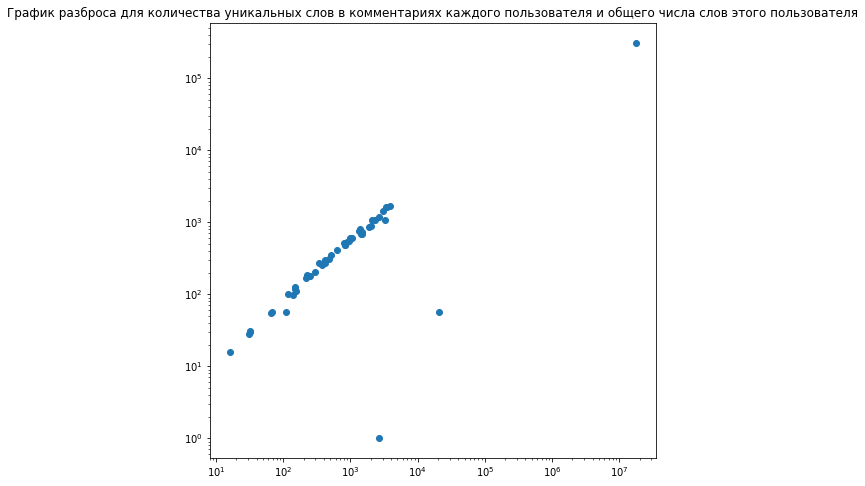

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(df_2['all_words'], df_2['all_uniq_words'])

ax.set_title('График разброса для количества уникальных слов в комментариях каждого пользователя и общего числа слов этого пользователя')

ax.set_yscale('log')
ax.set_xscale('log')

fig.set_figwidth(8)
fig.set_figheight(8)

plt.show()